In [1]:
# Instalación librerías
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [2]:
#importar bibliotecas necesarias
import pandas as pd
import numpy as np
import seaborn as sns
#algunos parámetros a Seaborn
sns.set_theme(style="white", color_codes=True)

In [3]:
#knn vecino más cercano con la data de las plantas
plantas=pd.read_csv('./assets/plant_growth_data.csv')
plantas.head()

,Soil_Type,Sunlight_Hours,Water_Frequency,Fertilizer_Type,Temperature,Humidity,Growth_Milestone
0,loam,5.192294,bi-weekly,chemical,31.719602,61.591861,0
1,sandy,4.033133,weekly,organic,28.919484,52.422276,1
2,loam,8.892769,bi-weekly,none,23.179059,44.660539,0
3,loam,8.241144,bi-weekly,none,18.465886,46.433227,0
4,sandy,8.374043,bi-weekly,organic,18.128741,63.625923,0


In [4]:
plantas.describe()

,Sunlight_Hours,Temperature,Humidity,Growth_Milestone
count,193.000000,193.000000,193.000000,193.000000
mean,6.826484,25.076087,58.098927,0.497409
std,1.599509,5.354170,12.631799,0.501294
min,4.033133,15.200000,30.567682,0.000000
25%,5.477000,20.637095,49.300000,0.000000
50%,6.833290,25.912336,59.182806,0.000000
75%,8.241144,29.757938,69.100000,1.000000
max,9.913903,34.810103,79.648240,1.000000


In [5]:
#mirar las instancias en la columna target
tipos=plantas['Growth_Milestone'].unique()
tipos

array([0, 1])

In [6]:
#contar cuántas por clase
plantas["Growth_Milestone"].value_counts()

Growth_Milestone
0    97
1    96
Name: count, dtype: int64

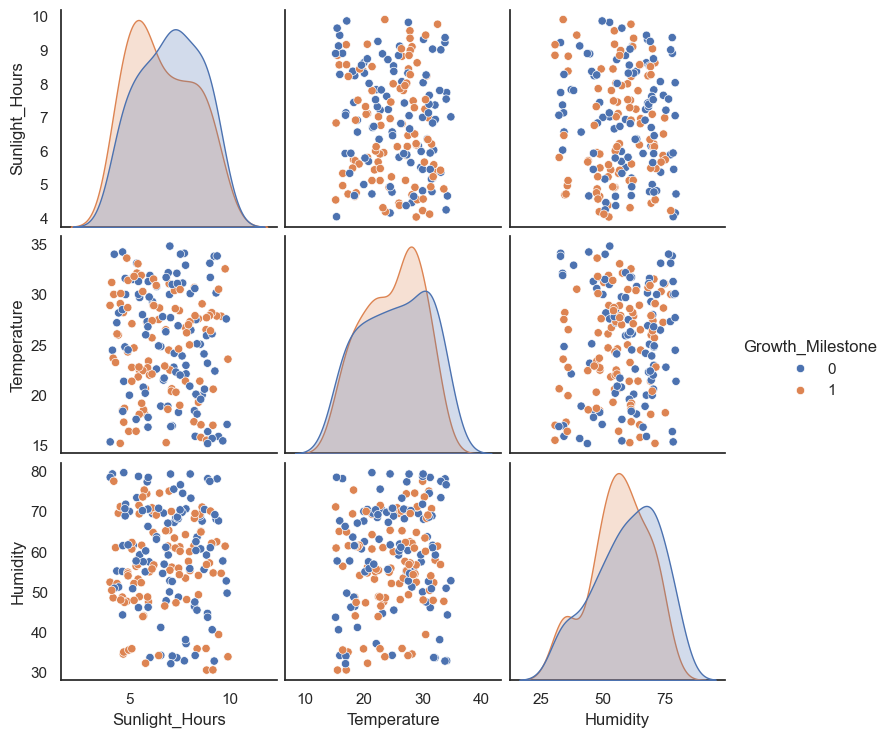

In [7]:
#separe las gráfica por la columna Target, dependiente
sns.pairplot(plantas, hue="Growth_Milestone")

In [8]:
#llamo al model de KNN
from sklearn.neighbors import KNeighborsClassifier

In [9]:
#selecciono los atributos, luz, temperatura, y humedad
X=plantas[['Sunlight_Hours','Temperature','Humidity']]
#si la planta creció o no
y=plantas['Growth_Milestone']

In [10]:
#parto la data en entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
#coloco un k de 11
neigh= KNeighborsClassifier(n_neighbors=3)
#entreno el modelo
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [12]:
#realizo la predicción
resultadoYtrain=neigh.predict(X_train)

In [13]:
#llamo a la matriz de confusión
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, resultadoYtrain)

array([[62, 18],
       [16, 58]])

In [14]:
from sklearn.metrics import classification_report
print(classification_report(y_train, resultadoYtrain))


              precision    recall  f1-score   support

           0       0.79      0.78      0.78        80
           1       0.76      0.78      0.77        74

    accuracy                           0.78       154
   macro avg       0.78      0.78      0.78       154
weighted avg       0.78      0.78      0.78       154



<function matplotlib.pyplot.show(close=None, block=None)>

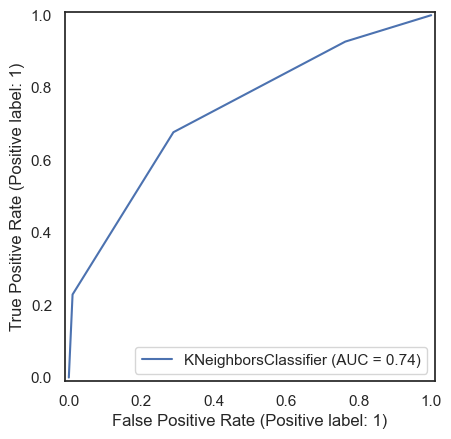

In [15]:
#se utiliza la Curva ROC
from sklearn.metrics import RocCurveDisplay, roc_auc_score
import matplotlib.pyplot as plt
#displayRoc=RocCurveDisplay.from_estimator(model, X_test, y_test)
displayRoc=RocCurveDisplay.from_estimator(neigh, X, y)

plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

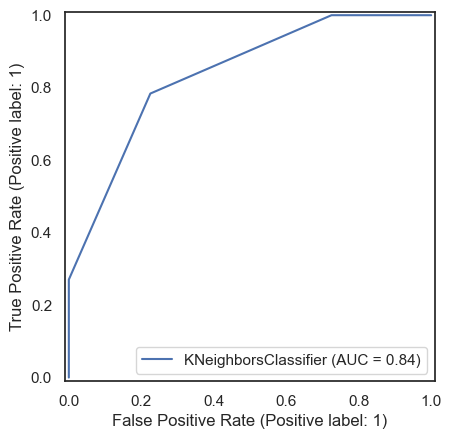

In [16]:
#curva de de Entrenamiento
#se utiliza la Curva ROC
from sklearn.metrics import RocCurveDisplay, roc_auc_score
import matplotlib.pyplot as plt
displayRoc=RocCurveDisplay.from_estimator(neigh, X_train, y_train)

plt.show


In [17]:
#con la data de prueba
ypredTEst=neigh.predict(X_test)

In [18]:
confusion_matrix(y_test, ypredTEst)

array([[ 7, 10],
       [15,  7]])

In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test, ypredTEst))

              precision    recall  f1-score   support

           0       0.32      0.41      0.36        17
           1       0.41      0.32      0.36        22

    accuracy                           0.36        39
   macro avg       0.36      0.36      0.36        39
weighted avg       0.37      0.36      0.36        39



In [22]:
#datonuevo=[10,9,1,1]
datonuevo=[5.0,	3.6,	1.4]
datonuevo=np.array(datonuevo).reshape(1,3)
resultado=neigh.predict(datonuevo)
resultado

/Users/sebastiancb/anaconda3/envs/env-talentotech-bootcamp/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1])

Escalar datos
datos_con_estandar_scaler=preprocessing.StandardScaler().fit_transform(temporal)
datos_con_estandar_scaler

In [23]:
#escalado de los datos
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
#estoy escalando los datos de entrenamiento
datos_con_estandar_scaler=preprocessing.StandardScaler().fit_transform(X_train)
datos_con_estandar_scaler

array([[ 1.08244187e-01,  1.33035234e+00,  7.27723006e-02],
       [-1.23253751e+00,  1.22206673e+00,  8.23863300e-01],
       [ 1.42315991e+00,  2.31164446e-01,  9.16617357e-01],
       [-1.87927270e-01,  4.44055669e-01, -1.86020444e+00],
       [ 4.28714781e-02,  1.24112254e+00, -8.07062194e-01],
       [ 1.30187574e+00, -1.84015933e+00, -2.13903501e+00],
       [ 1.30017627e+00,  4.78890016e-01, -1.11406770e-01],
       [-1.10081392e+00, -9.88407590e-01,  9.08887852e-01],
       [ 1.33893709e+00, -1.67685105e+00,  1.53970255e+00],
       [ 5.58145451e-01,  1.13378015e+00,  1.25773502e+00],
       [ 3.46272735e-01, -5.50123889e-01,  7.92945281e-01],
       [-1.60737221e+00, -2.87719058e-01, -7.50473922e-01],
       [-5.93272309e-01,  1.54941194e-01,  1.51396390e-01],
       [ 1.49893750e+00, -1.55711689e+00, -2.13594000e+00],
       [-5.33952463e-01, -4.69698305e-01, -7.34132077e-01],
       [-6.08255087e-01, -9.50295964e-01, -2.50537855e-01],
       [-1.43675311e+00,  5.69190299e-01

In [24]:
#coloco un k de 3, entreno el modelo con los datos "normalizados"
neigh= KNeighborsClassifier(n_neighbors=3)
#entreno el modelo
neigh.fit(datos_con_estandar_scaler, y_train)

KNeighborsClassifier(n_neighbors=3)

In [25]:
#realizo la predicción con datos normalizados
ypredNormalizado=neigh.predict(datos_con_estandar_scaler)

In [26]:
confusion_matrix(y_train, ypredNormalizado)

array([[62, 18],
       [17, 57]])

In [27]:
print(classification_report(y_train, ypredNormalizado))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78        80
           1       0.76      0.77      0.77        74

    accuracy                           0.77       154
   macro avg       0.77      0.77      0.77       154
weighted avg       0.77      0.77      0.77       154



<function matplotlib.pyplot.show(close=None, block=None)>

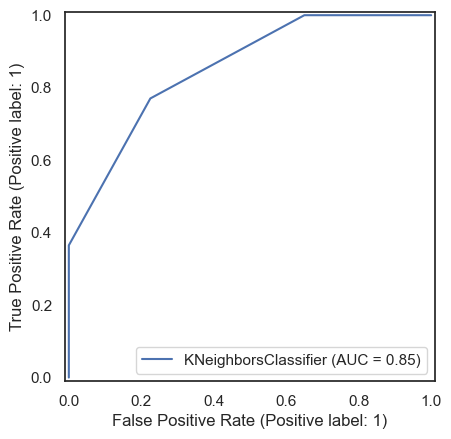

In [28]:
#curva ROC
displayRoc=RocCurveDisplay.from_estimator(neigh, datos_con_estandar_scaler, y_train)
plt.show